# Example: Calculating an RC Circuit

In [25]:
# Imports
%precision 2
import PhysicalQuantities as pq
import PhysicalQuantities.numpywrapper as nw
%load_ext PhysicalQuantities.ipython
from PhysicalQuantities.constants import eps0
def disp(s):
    display(HTML(s))


The PhysicalQuantities.ipython extension is already loaded. To reload it, use:
  %reload_ext PhysicalQuantities.ipython


We have a simple RC circuit, consisting of a voltage source $U_0$, a resistor with a value $R$ and a capacitor with value $C$:

![image1](images/rc.png)

Let's start with calculating the capacitance of a simple parallel plate capacitor:

In [26]:
A = 1 mm * 1 mm # Plate area
d = 1 um        # Plate distance
eps_r = 3       # Permittivity of dielectric material
C  = (eps0*eps_r*A) / d
disp("Capacitor value $C$ = %s" % C.pF)

The resistor is a thick film resistor:

In [27]:
ρ = 10 Ohm * 1 mm # Material resistivity
t = 10 um           # Sheet thickness
L = 150 um          # Structure length
W = 10 um           # Structure width
Rs = ρ / t 
R = Rs * L / W
disp("Resistor value $R$ = %s" % R.kOhm)

## Calculate transient response of circuit

In [28]:
u0 = 1. V
τ = 1/(R*C)
t = nw.linspace(0, 4/τ.base, 100).us

In [29]:
i0 = u0/R
i = (i0*e**(-t*τ)).uA
disp("Initial current is $i_0$ = %s" % i0.uA)

## Plot Current and Voltage over Time

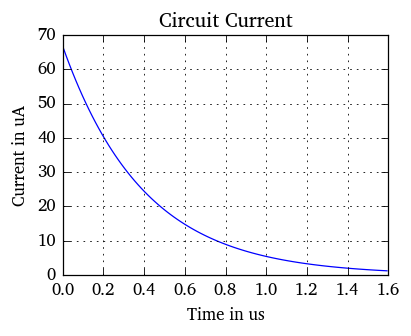

In [23]:
plot(t._,i._)
grid()
title('Circuit Current')
xlabel('Time in %s' % t.unit)
ylabel('Current in %s' % i.unit);

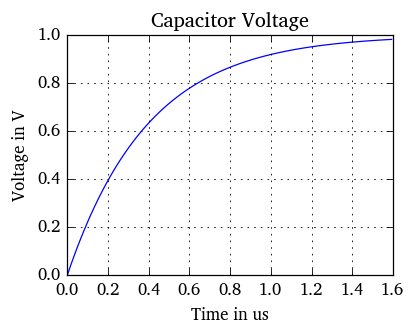

In [24]:
uc = u0 - i*R
plot(t._, uc._)
title('Capacitor Voltage')
grid()
xlabel('Time in %s' % t.unit)
ylabel('Voltage in %s' % uc.unit);